# N BODY: Generating the input and studying the output

## MODULES IMPORT

In [1]:
import numpy  as np
from numpy import random

import matplotlib.pyplot as plt

from astropy import constants as const
from astropy import units as u

In [2]:
# UNITS
# chosen units (same name as in astropy https://docs.astropy.org/en/stable/units/#module-astropy.units.astrophys)

my_u = ["au","yr","M_sun"]

# physical constants converted to chosen units

G = const.G.to(my_u[0]+"^3/("+my_u[1]+"^2 "+my_u[2]+")").value
c = const.c.to(my_u[0]+"/"+my_u[1]).value

# conversion constants between physical and internal units

R0 = 1.
M0 = 1.
T0 = np.sqrt(R0**3/(G*M0))

# INPUT GENERATION

In [3]:
# Setting the random number generator

rng = random.default_rng()

## Bound orbit

In [ ]:
# Example of a binary system - circular orbit
m1 = random.uniform(1,10) #Msun
m2 = random.uniform(1,10) #Msun
M = m1 + m2
r = 10 # au (distance)

r_rel = np.array([r, 0, 0])   #relative distance
v_rel = np.array([0, np.sqrt( G*M/r ), 0])    #relative velocity

# first body
r1 = -m2/M * r_rel
v1 = -m2/M * v_rel
# second body
r2 = m1/M * r_rel
v2 = m1/M * v_rel

In [ ]:
file_in = 'circ_in.txt'

# PRINT IC
m = np.array([m1,m2]) / M0
R = np.array([r1,r2]) / R0
v = np.array([v1,v2]) / (R0/T0)
n_body = 2
initial_time = 0

# All quantities in the IC file must be in internal units
with open(file_name_1,"w") as outfile:
    outfile.write(f"{n_body}\n")
    outfile.write(f"{initial_time}\n")
    for i in range(len(m)):
        outfile.write( "{:<25.15e} {:<25.15e} {:<25.15e} {:<25.15e} {:<25.15e} {:<25.15e} {:<25.15e}\n".format(m[i],R[i][0],R[i][1],R[i][2],v[i][0],v[i][1],v[i][2]) )


## Unbound orbit

In [4]:
# Random masses

m_1 = rng.uniform(1, 5)
m_2 = rng.uniform(1, 5)

r_rel = np.array([10, 0, 0])

M = m_1 + m_2
mu = m_1 * m_2 / M

d = np.linalg.norm(r_rel)

v_min = np.sqrt(2 * G * M / d)
v_rel = np.array([0, rng.uniform(v_min, 5 * v_min), 0])

# first body
r1 = -m_2/M * r_rel
v1 = -m_2/M * v_rel
# second body
r2 = m_1/M * r_rel
v2 = m_1/M * v_rel

In [5]:
file_in = 'hyper_in.txt'

m = np.array([m_1,m_2]) / M0
R = np.array([r1,r2]) / R0
v = np.array([v1,v2]) / (R0/T0)

n_body = 2
time_in = 0

# All quantities in the IC file must be in internal units
with open(file_in, "w") as outfile:
    outfile.write(f"{n_body}\n")
    outfile.write(f"{time_in}\n")
    
    for i in range(n_body):
        outfile.write( "{:<25.15e} {:<25.15e} {:<25.15e} {:<25.15e} {:<25.15e} {:<25.15e} {:<25.15e}\n".format(m[i],R[i][0],R[i][1],R[i][2],v[i][0],v[i][1],v[i][2]) )

# OUTPUT STUDY

In [19]:
# Loading data file

file_name = 'circ_out.txt'

m = 2 # number of rows to skip (i.e. number of bobies and time)
n = 4 # 'block' length

time_rows = []
data_rows = []
with open(file_name, "r") as file:
    lines = file.readlines()
    for i in range(0, len(lines), n):  # move through rows every n rows
        time_rows.extend(lines[i+1:i+m])
        data_rows.extend(lines[i+m:i+n])

time = np.loadtxt(time_rows)
data = np.loadtxt(data_rows)

In [20]:
# Fetching data

m_1, m_2 = data[0, 0], data[1, 0]

r_1, r_2 = data[::2, 1:4], data[1::2, 1:4]
v_1, v_2 = data[::2, 4:7], data[1::2, 4:7]

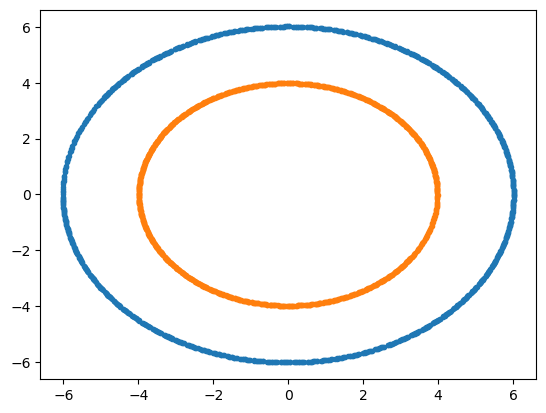

In [21]:
plt.plot(r_1[:, 0], r_1[:, 1], '.')
plt.plot(r_2[:, 0], r_2[:, 1], '.')

In [10]:
# Total energy of the system

b_1, b_2 = data[::2], data[1::2]

K_1 = b_1[:, 0] * np.linalg.norm(b_1[:, 4:7], axis=1)**2 / 2
K_2 = b_2[:, 0] * np.linalg.norm(b_2[:, 4:7], axis=1)**2 / 2
U = -b_1[:, 0] * b_2[:, 0] / np.linalg.norm(b_1[:, 1:4] - b_2[:, 1:4], axis=1)

E_tot = K_1 + K_2 + U
print(K_1.mean(), K_2.mean(),U.mean(), E_tot.mean())

1.4758005812905135 0.9772360937340077 -4.906073345765677 -2.453036670741156


In [22]:
# Eccentricity

d = np.linalg.norm(r_1 - r_2, axis=1)
a, b = d.max(), d.min()

e = np.sqrt(a**2 - b**2) / a
print(e)

5.796333967155069e-05
